In [2]:
import matplotlib.pyplot as plt
import numpy as np

from centrex_trajectories import (
    Coordinates,
    Gravity,
    PropagationType,
    Velocities,
    propagate_trajectories,
    PropagationOptions,
)
from centrex_trajectories.particles import TlF
from centrex_trajectories.beamline_objects import (
    ElectrostaticQuadrupoleLens,
    Bore,
)


In [3]:
plt.rcParams.update({"font.size": 14})

# Parameters

In [8]:
options = PropagationOptions(verbose=False, n_cores=2)
gravity = Gravity(0, -9.81, 0)
particle = TlF()

in_to_m = 25.4e-3

eql_radius = 1.75 * in_to_m / 2


# Initial coordinates and trajectory simulation

In [9]:
x = Coordinates(
    x=np.ones((2, 1)) * eql_radius / 32.5, y=np.zeros((2, 1)), z=np.zeros((2, 1))
)
v = Velocities(vx=np.zeros((2, 1)), vy=np.ones((2, 1)) * 0.2, vz=np.ones((2, 1)) * 5)
t = np.zeros((2, 1))


In [10]:
eql_test = ElectrostaticQuadrupoleLens(
    name="EQL",
    objects=[Bore(0, 0, 0, 1.0, eql_radius)],
    start=0,
    stop=1.0,
    V=30_000,
    R=eql_radius,
    save_collisions=True,
)

sec_dat, trajs = propagate_trajectories(
    [eql_test], x, v, TlF(), t, Gravity(0, 0, 0), options=options
)


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:    0.9s finished


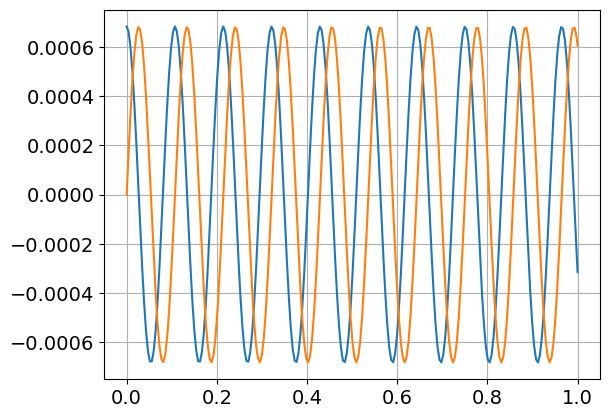

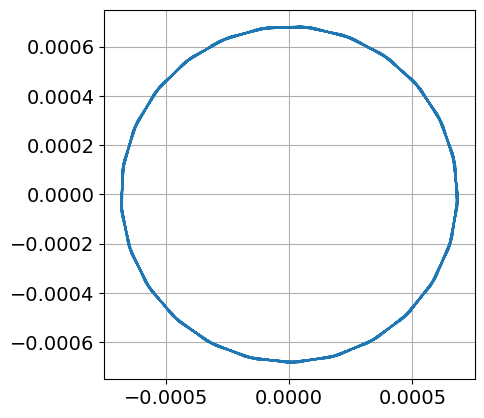

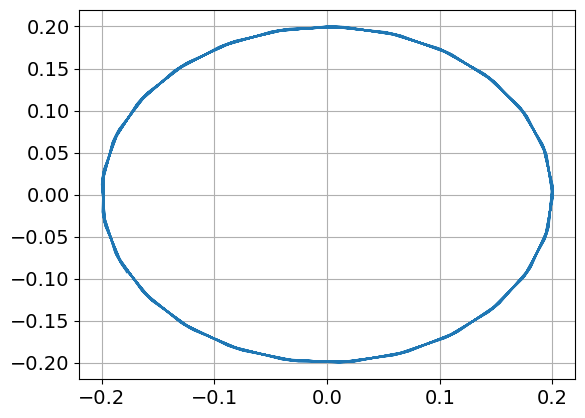

In [7]:
traj = trajs[0]

fig, ax = plt.subplots()
ax.plot(traj.z, traj.x)
ax.plot(traj.z, traj.y)
ax.grid()

fig, ax = plt.subplots()
ax.plot(traj.x, traj.y)
ax.set_aspect(1.0)
ax.grid()

fig, ax = plt.subplots()
ax.plot(traj.vx, traj.vy)
ax.grid()


In [ ]:
fig, ax = plt.subplots()

ax.plot(
    1 / 2 * TlF().mass * (traj.vx**2 + traj.vy**2)
    + eql_test.stark_potential(traj.x, traj.y, traj.z)
)
